In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib
matplotlib.style.use("ggplot")

In [2]:
def sigmoid(t):
    return (1 / (1 + np.e ** -t))

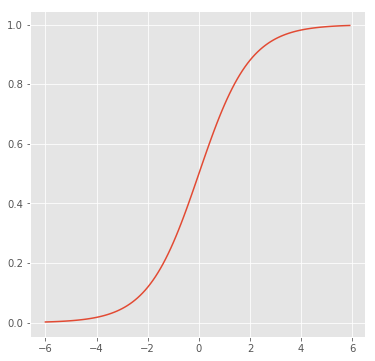

In [3]:
plt.figure(figsize=(6, 6))

x = np.arange(-6, 6, 0.1)
y = sigmoid(x)

plt.plot(x, y)

1. Import titanic data
2. Convert the cabin variable
3. Impute median age for NaN age variables

In [4]:
from sklearn import linear_model
from sklearn import preprocessing

In [5]:
%ls data

h1b_kaggle.csv                 titanic-train.csv
titanic-gender-submission.csv  twolves-comments.csv
titanic-test.csv               uber/


In [6]:
df = pd.read_csv("data/titanic-train.csv")
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
del df["PassengerId"]
del df["Name"]
del df["Ticket"]

In [8]:
df["Cabin"] = df["Cabin"].fillna("n").str.upper().str[0]

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


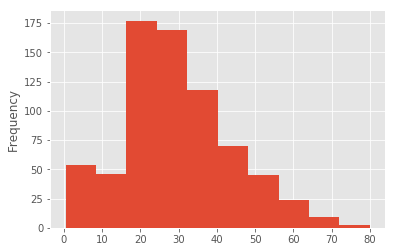

In [9]:
print(df["Age"].describe())
df["Age"].plot(kind="hist")

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


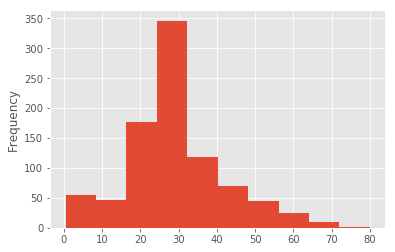

In [10]:
imp = preprocessing.Imputer(strategy="median")
df["Age"] = pd.DataFrame(
    imp.fit_transform(df[["Age"]])
)

print(df["Age"].describe())
df["Age"].plot(kind="hist")

In [11]:
from utils.models import *

In [12]:
label_encoder = preprocessing.LabelEncoder()
X = pd.DataFrame(label_encoder.fit_transform(df["Sex"]))
y = df["Survived"]

lm = linear_model.LogisticRegression()
lm.fit(X=X, y=y)

lm_evaluate(lm)

Intercept: [ 1.00027876]
Coefficients: [[-2.43010712]]


In [13]:
probs = pd.DataFrame(lm.predict_proba(X), columns=["Died", "Survived"])
pd.crosstab(index=df["Sex"], columns=probs["Survived"])

Survived,0.193125428972,0.731113382332
Sex,,
female,0,314
male,577,0


Add pclass, cabin, age, make predictions and compare them to the actual values.

In [14]:
df.columns

Index([u'Survived', u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Cabin', u'Embarked'],
      dtype='object')

In [32]:
label_encoder = preprocessing.LabelEncoder()
X_Pclass = label_encoder.fit_transform(df["Pclass"])
X_Cabin = label_encoder.fit_transform(df["Cabin"])
X_Sex = label_encoder.fit_transform(df["Sex"])
X_Age = df["Age"]

In [33]:
X = pd.DataFrame([X_Pclass, X_Cabin, X_Sex, X_Age]).T
y = df["Survived"]

In [34]:
lm = linear_model.LogisticRegression()
lm.fit(X=X, y=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
_ = lm_evaluate(lm, X, y)

Intercept: [ 3.30144158]
Coefficients: [[-0.92996321 -0.06409929 -2.43051824 -0.02649212]]
R-Squared Value: 0.793490460157
RMSE: 0.45443320724


In [36]:
y_pred = lm.predict(X)

In [53]:
pd.crosstab(index=y_pred, columns=y, rownames=["Predicted"], colnames=["Actual"])

Actual,0,1
Predicted,,
0,464,99
1,85,243


In [50]:
pd.crosstab(index=y_pred, columns=y, rownames=["Predicted"], colnames=["Actual"]) / len(y)

Actual,0,1
Predicted,,
0,0.520763,0.111111
1,0.095398,0.272727


## Confusion matrix

In [51]:
from sklearn import metrics

In [52]:
metrics.confusion_matrix(y_true=y, y_pred=y_pred)

array([[464,  85],
       [ 99, 243]])

In [54]:
print(metrics.classification_report(y_true=y, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       549
          1       0.74      0.71      0.73       342

avg / total       0.79      0.79      0.79       891



## Logistic regression on test set

In [83]:
df_test = pd.read_csv("data/titanic-test.csv")
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [84]:
del df_test["Name"]
del df_test["Ticket"]

In [85]:
df_test["Cabin"] = df_test["Cabin"].fillna("N").str[0]

In [86]:
df_test["Age"].count()

332

In [87]:
imp = preprocessing.Imputer(strategy="median")
df_test["Age"] = imp.fit_transform(df_test[["Age"]])

In [88]:
df_test["Age"].count()

418

In [89]:
label_encoder = preprocessing.LabelEncoder()
X_Pclass = label_encoder.fit_transform(df_test["Pclass"])
X_Cabin = label_encoder.fit_transform(df_test["Cabin"])
X_Sex = label_encoder.fit_transform(df_test["Sex"])
X_Age = df_test["Age"]

In [90]:
X = pd.DataFrame([X_Pclass, X_Cabin, X_Sex, X_Age]).T
y_preds = lm.predict(X)

In [91]:
%ls data

h1b_kaggle.csv                 titanic-train.csv
titanic-gender-submission.csv  twolves-comments.csv
titanic-test.csv               uber/


In [92]:
res = pd.read_csv("data/titanic-gender-submission.csv")
res.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [94]:
subm = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_preds
}, index=df_test.index)
subm.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [96]:
subm.to_csv("data/subm_titanic_logistic_regression.csv", index=False)